In [ ]:
from tensorflow.keras import layers , models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
noise_factor = 0.8
x_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape) 
x_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape) 
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

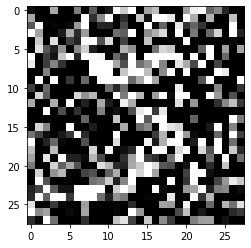

In [ ]:
first_image = x_train_noisy[0]
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

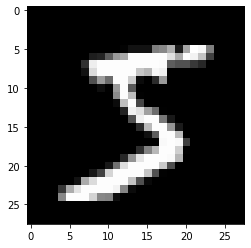

In [ ]:
first_image = X_train[0]
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [ ]:
input = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(16, (3, 3), padding='same', activation='relu')(input)
x = layers.MaxPooling2D(pool_size=(2,2), padding='same')(x)
x = layers.Conv2D(8,(3, 3), padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=(2,2), padding='same')(x)
x = layers.Conv2D(1, (3, 3), padding='same', activation='sigmoid')(x)


y = layers.Conv2D(8, (3, 3), padding='same', activation='relu')(x)
y = layers.UpSampling2D((2, 2))(y)
y = layers.Conv2D(16, (3, 3), padding='same', activation='relu')(y)
y = layers.UpSampling2D((2, 2))(y)
out = layers.Conv2D(1,(3, 3), padding='same', activation='sigmoid')(y)
autoencoder = models.Model(inputs = input, outputs = out)

In [ ]:
#or, you can use a model with Conv2DTranspose layers

input = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(16, (3, 3), padding='same', activation='relu')(input)
x = layers.MaxPooling2D(pool_size=(2,2), padding='same')(x)
x = layers.Conv2D(8,(3, 3), padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=(2,2), padding='same')(x)
x = layers.Conv2D(1, (3, 3), padding='same', activation='sigmoid')(x)


y = layers.Conv2DTranspose(8, (2, 2), activation='relu')(x)
y = layers.Conv2DTranspose(8, (5, 5), activation='relu')(y)
y = layers.Conv2DTranspose(8, (5, 5), activation='relu')(y)
y = layers.Conv2DTranspose(16, (5, 5), activation='relu')(y)
y = layers.Conv2DTranspose(16, (5, 5), activation='relu')(y)
out = layers.Conv2DTranspose(1, (5, 5), activation='sigmoid')(y)
autoencoder = models.Model(inputs = input, outputs = out)

In [ ]:
autoencoder.compile(loss='mse', optimizer='adam') 

In [ ]:
autoencoder.fit(x_train_noisy, X_train, epochs = 10, batch_size = 20, shuffle = True, validation_split = 0.2)

Epoch 1/10
2400/2400 [==============================] - 15s 5ms/step - loss: 0.0466 - val_loss: 0.0359
Epoch 2/10
2400/2400 [==============================] - 10s 4ms/step - loss: 0.0347 - val_loss: 0.0339
Epoch 3/10
2400/2400 [==============================] - 10s 4ms/step - loss: 0.0334 - val_loss: 0.0336
Epoch 4/10
2400/2400 [==============================] - 10s 4ms/step - loss: 0.0327 - val_loss: 0.0326
Epoch 5/10
2400/2400 [==============================] - 11s 4ms/step - loss: 0.0323 - val_loss: 0.0327
Epoch 6/10
2400/2400 [==============================] - 10s 4ms/step - loss: 0.0320 - val_loss: 0.0325
Epoch 7/10
2400/2400 [==============================] - 10s 4ms/step - loss: 0.0318 - val_loss: 0.0319
Epoch 8/10
2400/2400 [==============================] - 10s 4ms/step - loss: 0.0316 - val_loss: 0.0331
Epoch 9/10
2400/2400 [==============================] - 11s 4ms/step - loss: 0.0315 - val_loss: 0.0316
Epoch 10/10
2400/2400 [==============================] - 10s 4ms/step - l

In [ ]:
decoded = autoencoder.predict(x_test_noisy)

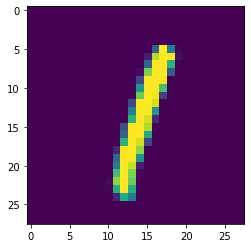

In [ ]:
plt.imshow(X_test[5].reshape(28, 28))

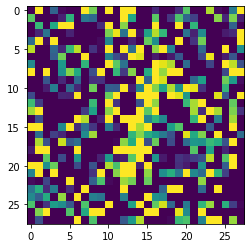

In [ ]:
plt.imshow(x_test_noisy[5].reshape(28, 28))

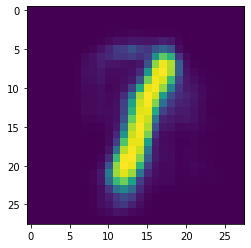

In [ ]:
plt.imshow(decoded[5].reshape(28, 28))

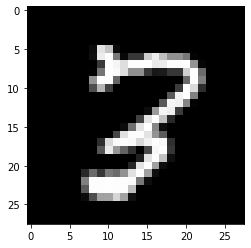

In [ ]:
plt.imshow(X_test[578].reshape(28, 28), cmap='gray')

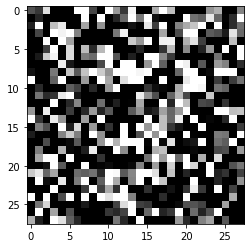

In [ ]:
plt.imshow(x_test_noisy[578].reshape(28, 28), cmap='gray')

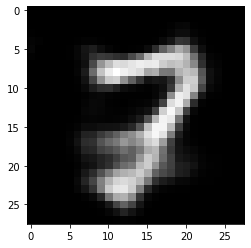

In [ ]:
plt.imshow(decoded[578].reshape(28, 28), cmap='gray')